# Job Outcomes by Major

This dataset examines the job outcomes of students who graduated from college between 2010 and 2012. The original data was released by American Community Survey, and the cleaned data was released by FiveThirtyEight.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

Using visualizations, we can explore some questions:
- Do students in more popular majors make more money?
- How many majors are predominantely male? Predominantely female?
- Which category of majors have the most students?

In [2]:
# start by importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# run the Jupyter magic so that plots are displayed inline
%matplotlib inline

In [3]:
# Read the dataset into a DataFrame.
recent_grads = pd.read_csv('recent-grads.csv')
# Examine the first row.
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# Further explore the data to see the top and bottom ranks of majors.
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# Generate summary statistics for the numeric columns.
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Now, we will drop all rows that contain missing values. This is a necessary step because matplotlib expects that all columns have matching lengths. Therefore, any missing values will cause errors when plotting.

In [7]:
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print(raw_data_count)
print(cleaned_data_count)

173
172


Cleaning the data removed only a single row of data, so we can still feel confident in any conclusions drawn from the cleaned dataset.

## Pandas Scatter Plots

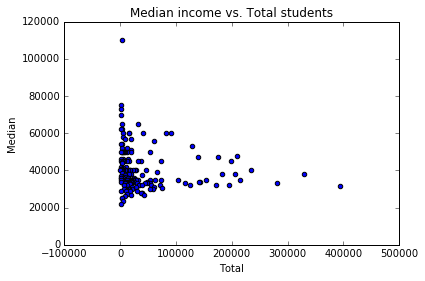

In [8]:
recent_grads.plot(x='Total', y='Median',
                  kind='scatter', 
                  title='Median income vs. Total students')

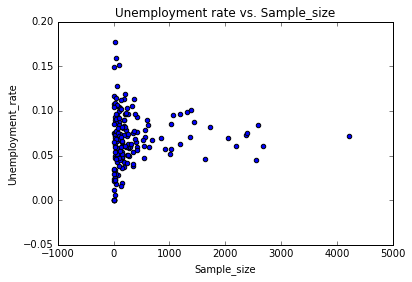

In [9]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate',
                  kind='scatter', 
                  title='Unemployment rate vs. Sample_size')

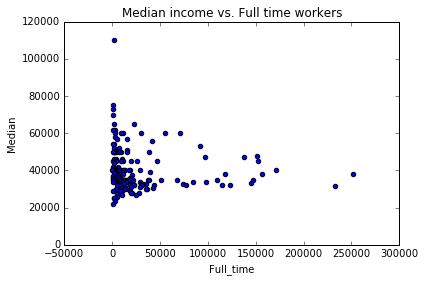

In [10]:
recent_grads.plot(x='Full_time', y='Median',
                  kind='scatter', 
                  title='Median income vs. Full time workers')

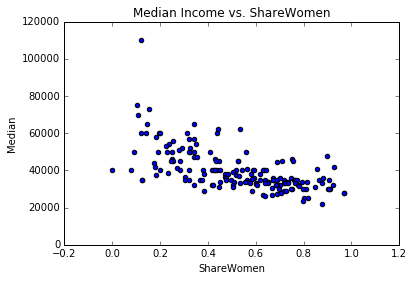

In [11]:
recent_grads.plot(x='ShareWomen', y='Median',
                  kind='scatter', 
                  title='Median Income vs. ShareWomen')

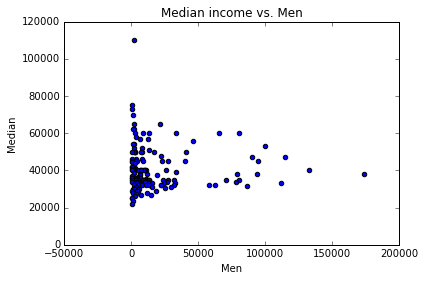

In [12]:
recent_grads.plot(x='Men', y='Median',
                  kind='scatter', 
                  title='Median income vs. Men')

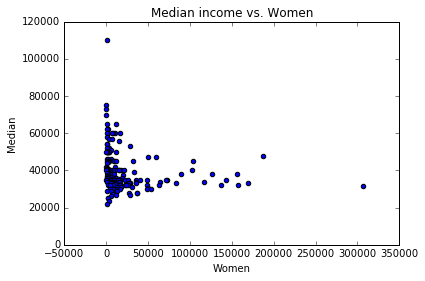

In [13]:
recent_grads.plot(x='Women', y='Median',
                  kind='scatter', 
                  title='Median income vs. Women')

Using the above plots, we can examine the following:
* Do students in more popular majors make more money?
    *  The total number of students in a major does not seem to be correlated with the median income of the jobs following graduation.
* Do students that majored in subjects that were majority female make more money?
    *  There is a slight negative correlation between the percentage of women in a major and the median income. Specifically, no majors that offer a median starting salary of above \$60,000 have more than 50\% women.
* Is there any link between the number of full-time employees and median salary?
    *  There doesn't appear to be any correlations between the number of workers and median salary. Very few majors have more than 50,000 full-time workers. Those majors that do have more than 50,000 full-time workers have median income between \$30,000 and \$60,000. 

## Pandas Histograms

Next, we'll create several histograms to explore the following questions:
- What percentage of majors are predominantly male? Predominantly female?
- What is the most common median salary range?

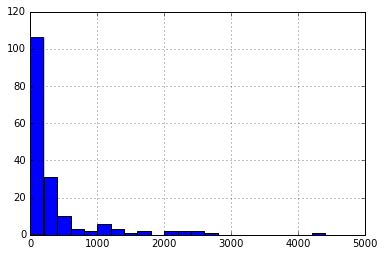

In [14]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

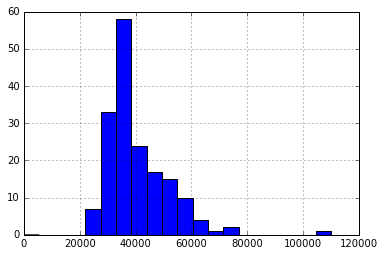

In [19]:
recent_grads['Median'].hist(bins=20, range=(0,110000))

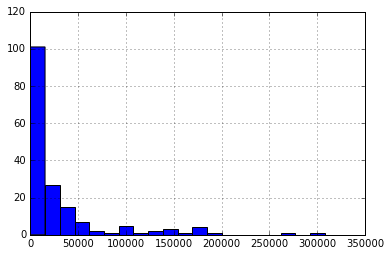

In [21]:
recent_grads['Employed'].hist(bins=20)

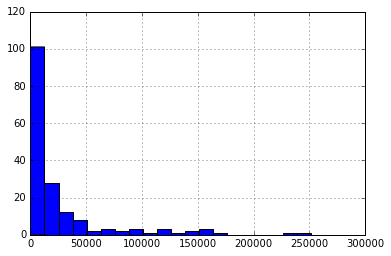

In [22]:
recent_grads['Full_time'].hist(bins=20)

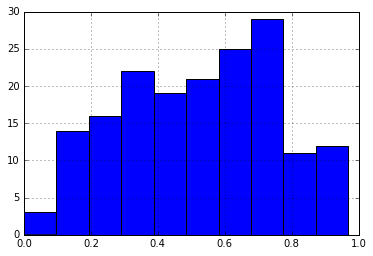

In [29]:
recent_grads['ShareWomen'].hist(bins=10)

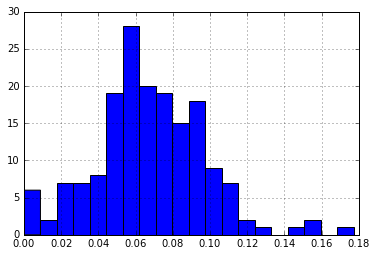

In [24]:
recent_grads['Unemployment_rate'].hist(bins=20)

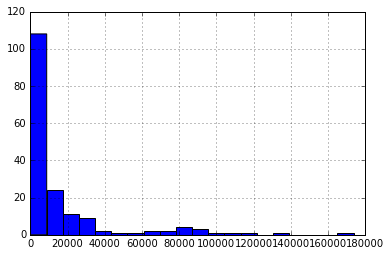

In [25]:
recent_grads["Men"].hist(bins=20)

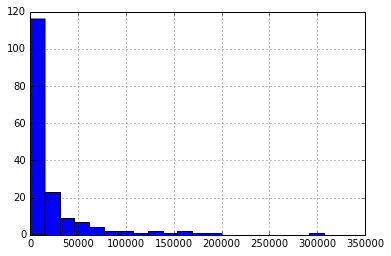

In [26]:
recent_grads["Women"].hist(bins=20)

Returning to our initial questions:
- Taking the assumption that "predominantly" indicates that at least 70% of the students are a single gender, 33 majors are predominantly male, while 52 are predominatly female. If we make this definition more strict by assuming that "predominatly" requires that at least 80% of the students are a single gender, then 17 majors are predominantly male, while 23 majors are predominatly female. Since the cleaned dataset includes 172 different majors, we can also give these numbers in terms of percentages. Assuming a definition of 70%, 19% of majors are predominantly male, and 30% are predominantly female. Assuming a definition of 80%, 10% of majors are predominantly male, and 13% are predominantly female.
- By far, the most common median salary is \$30,000 to \$40,000. More than half of all of the college majors had starting salaries in this range.

## Pandas Scatter Matrix Plot

A **scatter matrix plot** combines a scatter plot and a histogram into one grid and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of `n` by `n` plots on a grid, where `n` is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots. 

We need to start by importing this function from the `pandas.plotting` module.

In [30]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b172ac9e8>,
      dtype=object)

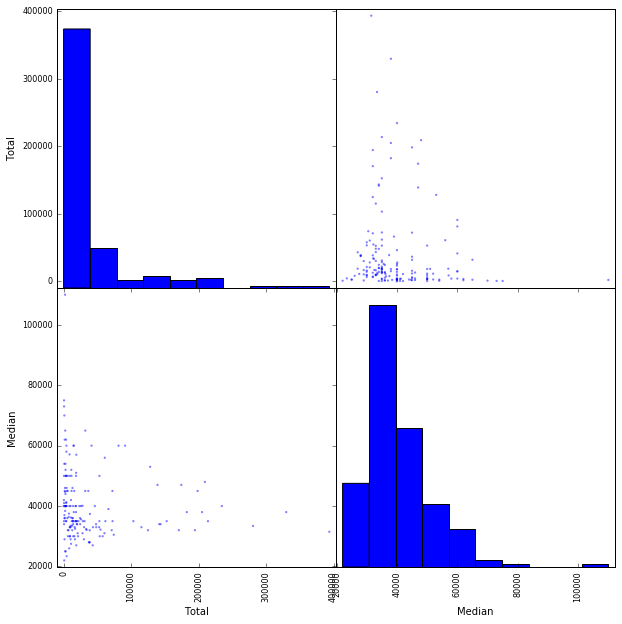

In [34]:
scatter_matrix(recent_grads[['Total','Median']],
               figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b1776af28>,
      dtype=object)

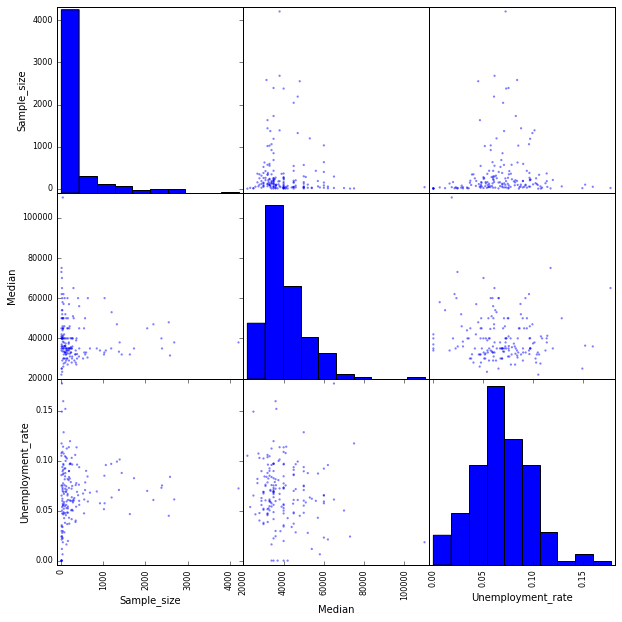

In [33]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],
               figsize=(10,10))

## Pandas Bar Plots

Finally, we will use bar plots to compare the percentages of women and the unemployment rate from the first 10 rows and last 10 rows of the sorted dataframe.

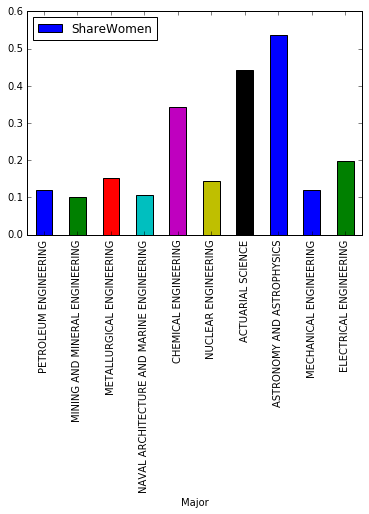

In [35]:
recent_grads[:10].plot.bar(x="Major", y="ShareWomen")

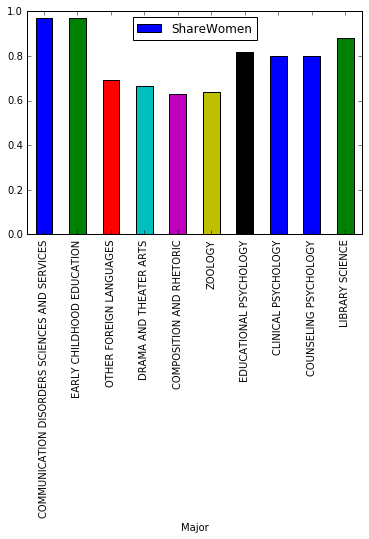

In [36]:
recent_grads[-10:].plot.bar(x="Major", y="ShareWomen")

These two bar plots show a very clear difference in the percentage of women for the ten most lucrative majors and the lowest paying majors. Out of the 10 highest paying majors, 60% have less than 15% women, and 70% have less than 20% women. 

In sharp contrast, all of the 10 lowest paying majors have at least 60% women, and 60% of these majors are 80% or more women. 

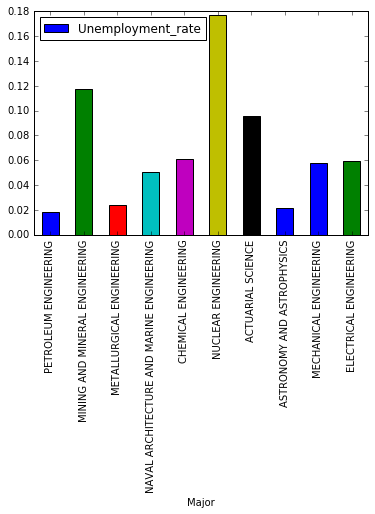

In [37]:
recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate")

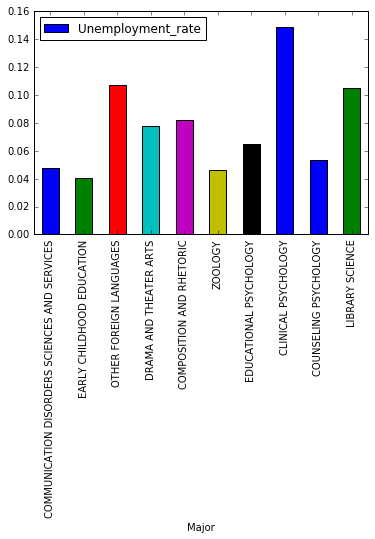

In [38]:
recent_grads[-10:].plot.bar(x="Major", y="Unemployment_rate")

The ten highest paying majors have a slightly lower unemployment rate than the ten lowest paying majors. Interestingly, nuclear engineering appears to be an outlier in the top ten majors at an unemplyment rate of 18%, which is also higher than all of the unemployment rates for the ten lowest paying majors. This could indicate that nuclear engineering is a relatively small field with a lower higher rate than the number of graduating students. 

## Next Steps

Some ideas for next steps:
* use a grouped bar plot to compare the number of men to the number of women in each category of majors.
* use a box plot to explore 